In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../../Data/f_win.csv')

In [3]:
df.head()

,Unnamed: 0,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling,Win
0,0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0,1
1,1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0,1
2,2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0,1
3,3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0,0
4,4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0,0


In [4]:
X = df.drop(['Unnamed: 0','Win'],axis=1)
y = df['Win']

In [5]:
df.head()

,Unnamed: 0,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling,Win
0,0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0,1
1,1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0,1
2,2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0,1
3,3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0,0
4,4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0,0


In [6]:
# Vis to 2-d 
pca_2 = PCA(n_components=2)

In [7]:
X_2 = pca_2.fit_transform(X)

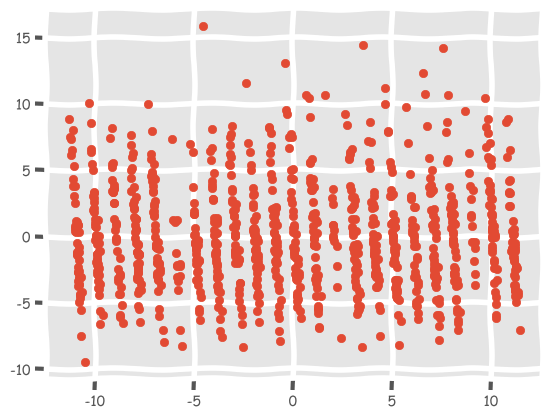

In [8]:
plt.xkcd()
plt.style.use('ggplot')
plt.scatter(X_2[:, 0], X_2[:,1])

In [9]:
pca_2.components_

array([[ 2.62492176e-04, -9.99030602e-01,  1.94319785e-02,
        -1.13825704e-02, -4.19379309e-03,  2.67287052e-03,
        -3.65129099e-02, -7.92495035e-03, -2.46778959e-03,
         1.30678492e-03,  1.44756412e-03],
       [-8.80167230e-03, -3.71779171e-02, -4.73095002e-03,
         1.25881969e-02,  1.25244572e-01, -7.86364922e-02,
         9.25836289e-01,  3.31133391e-01, -9.78401470e-02,
         5.55926138e-03,  7.98939891e-03]])

In [10]:
pca_2.explained_variance_ratio_

array([0.60161486, 0.21379051])

In [11]:
np.cumsum(pca_2.explained_variance_ratio_)

array([0.60161486, 0.81540537])

In [12]:
pca = PCA(n_components=X.shape[1])

In [13]:
X_all = pca.fit_transform(X)

In [14]:
pca.explained_variance_ratio_

array([6.01614861e-01, 2.13790514e-01, 9.94871650e-02, 4.15233137e-02,
       1.51225386e-02, 1.22081719e-02, 7.67784356e-03, 4.27736851e-03,
       3.36305032e-03, 8.83351822e-04, 5.18216226e-05])

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > .95) +1

In [16]:
d

4

In [22]:
pca_4 = PCA(n_components=4) # PCA(n_components=0.95)
X_4 = pca_4.fit_transform(X)

In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_4, y, random_state = 42)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train_pca, y_train_pca)

RandomForestClassifier()

In [27]:
y_pred_pca = rf.predict(X_test_pca)

In [28]:
# Accuracy with PCA

accuracy_score(y_test_pca, y_pred_pca)

0.6244897959183674

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
# Accuracy with all data

accuracy_score(y_test, y_pred)

0.6816326530612244